# Fake news detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

# Data cleaning and preparation

In [5]:
#Add flag to datasets to track fake and real

fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [7]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [8]:
#combine two data sets (Concatente dataframes)

data = pd.concat([fake,true]).reset_index(drop=True)
data.shape

(44898, 5)

In [9]:
#we have to shuffle the data because all the fake data is in top and all true data is at bottom

#shuffling data

from sklearn.utils import shuffle
data = shuffle(data)
data=data.reset_index(drop=True)

In [10]:
#checking if the data is shuffeled or not

data.head()

,title,text,subject,date,target
0,Transgender court hearing set amid fight over ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"February 3, 2017",true
1,Sean Spicer’s Twitter History Comes Back To B...,No matter what Donald Trump does or where he g...,News,"March 25, 2017",fake
2,House panel asks Trump ex-top aide Bannon to t...,"WASHINGTON (Reuters) - Steve Bannon, a former ...",politicsNews,"December 22, 2017",true
3,Uzbek president says economic data was 'fictio...,TASHKENT (Reuters) - President Shavkat Mirziyo...,worldnews,"December 22, 2017",true
4,BOOM! Rep Louie Gohmert (R-TX) Rips Into Obama...,Don t think for a minute this union-style Blac...,politics,"Jun 23, 2016",fake


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
#in this data the date is not needed so were removing the date
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Transgender court hearing set amid fight over ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,true
1,Sean Spicer’s Twitter History Comes Back To B...,No matter what Donald Trump does or where he g...,News,fake
2,House panel asks Trump ex-top aide Bannon to t...,"WASHINGTON (Reuters) - Steve Bannon, a former ...",politicsNews,true
3,Uzbek president says economic data was 'fictio...,TASHKENT (Reuters) - President Shavkat Mirziyo...,worldnews,true
4,BOOM! Rep Louie Gohmert (R-TX) Rips Into Obama...,Don t think for a minute this union-style Blac...,politics,fake


In [13]:
#we dont need the title because we can get the title by reading the text so , were removing the title

#removing title
data.drop(["title"],axis=1,inplace=True)
data.head()


,text,subject,target
0,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,true
1,No matter what Donald Trump does or where he g...,News,fake
2,"WASHINGTON (Reuters) - Steve Bannon, a former ...",politicsNews,true
3,TASHKENT (Reuters) - President Shavkat Mirziyo...,worldnews,true
4,Don t think for a minute this union-style Blac...,politics,fake


In [14]:
# converting uppercase letters to lowercase letters

data['text']=data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the u.s. supreme court ...,politicsNews,true
1,no matter what donald trump does or where he g...,News,fake
2,"washington (reuters) - steve bannon, a former ...",politicsNews,true
3,tashkent (reuters) - president shavkat mirziyo...,worldnews,true
4,don t think for a minute this union-style blac...,politics,fake


In [15]:
#remove punctuation (the words got repeated in a same sentence)

import string

def punctuation_removal(text):
    all_list=[char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
#check
data.head()

,text,subject,target
0,washington reuters the us supreme court on fr...,politicsNews,true
1,no matter what donald trump does or where he g...,News,fake
2,washington reuters steve bannon a former top ...,politicsNews,true
3,tashkent reuters president shavkat mirziyoyev...,worldnews,true
4,don t think for a minute this unionstyle black...,politics,fake


In [17]:
#removing stopwords
import nltk   #nltk is natural language tool kit

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neoad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
data.head()

,text,subject,target
0,thank goodness still courageous conservative a...,left-news,fake
1,yesterday trae crowder otherwise known liberal...,News,fake
2,jerusalem reuters israeli cabinet minister sai...,worldnews,true
3,worry liberal elite always know best little pe...,Government News,fake
4,london reuters britain international developme...,worldnews,true


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


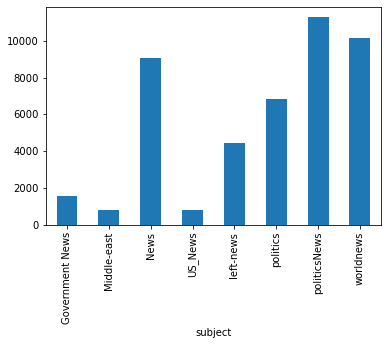

In [19]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


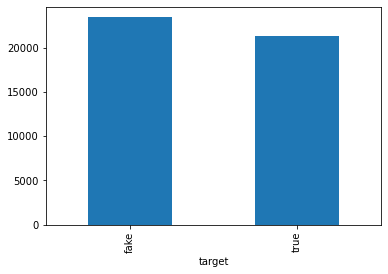

In [20]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [21]:
!pip install wordcloud

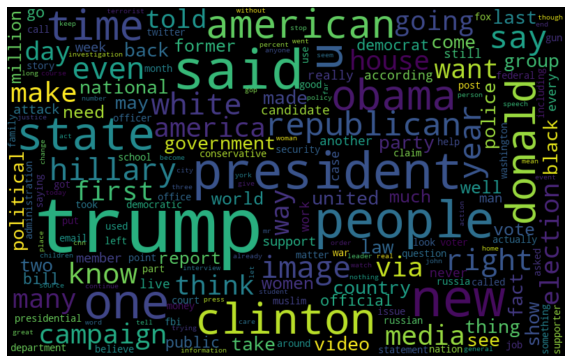

In [22]:
# Word cloud for fake news (shows a graphical image of he most used words in fake news)
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

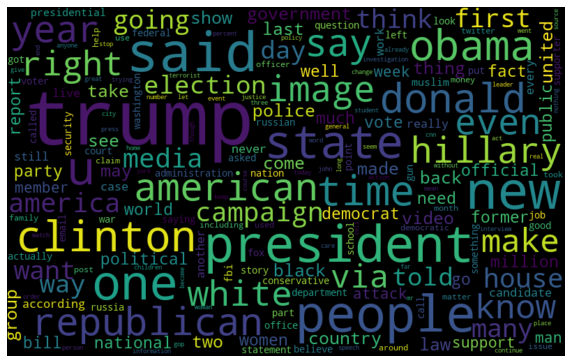

In [23]:
# Word cloud for real news(shows a graphical image of he most used words in real news)
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Most frequent words counter   (used to find how many times the word is usd in the text)
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

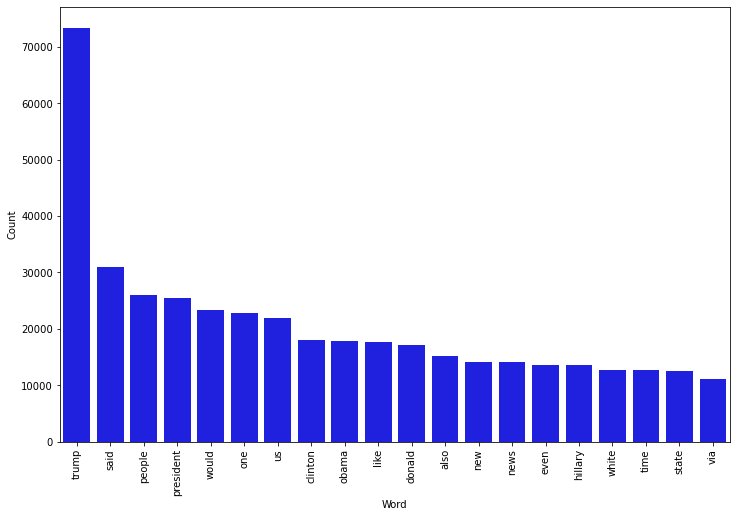

In [25]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

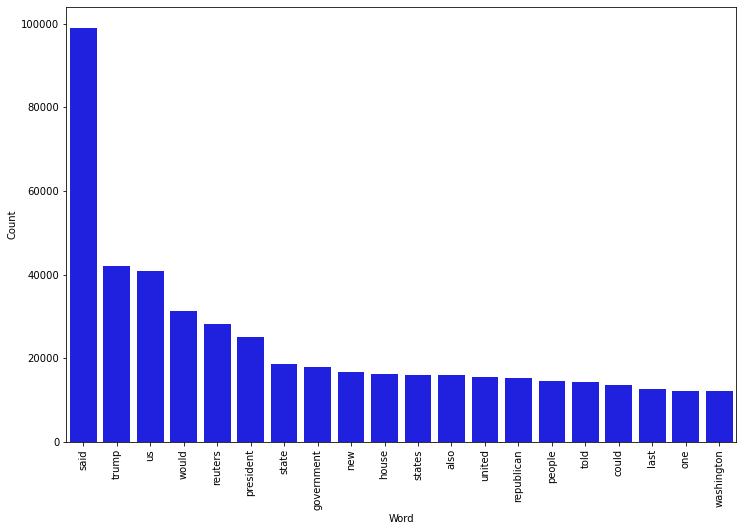

In [26]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [27]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split data 

In [28]:
#spliting the data (20% as testing and 80%as training) 
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [29]:
X_train.head()

36335    istanbul reuters turkish police officer shot s...
12384    kandahar afghanistan reuters afghan taliban at...
24419    moscow reuters president vladimir putin said w...
24740    ironic crazed leftists antitrump agenda hard t...
27039    dividing america obama legacy hillary continue...
Name: text, dtype: object

In [30]:
y_train.head()

36335    true
12384    true
24419    true
24740    fake
27039    fake
Name: target, dtype: object

# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


Confusion matrix, without normalization


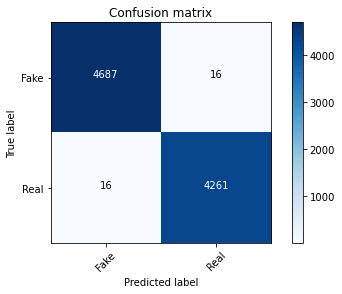

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])